In [34]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

%pylab inline
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


## Carrega dados do FMI referentes ao Brasil

In [35]:
df = pd.read_csv("../data/brazil_gdp_inflation_ir.csv", dtype={'Time':np.int32, 'GDP':np.float64, 'Inflation':np.float64, 'Interest':np.float64}, index_col="Time")

#### Exibimos série histórica

In [36]:
brazil = df.sort()
brazil

##Regressão entre taxa de inflação e taxa de crescimento do PIB

Como já evidenciado em outros estudos diferentes (e em momentos diferentes) não existe correlação entre inflação e crescimento para valores de inflação de até 10%.

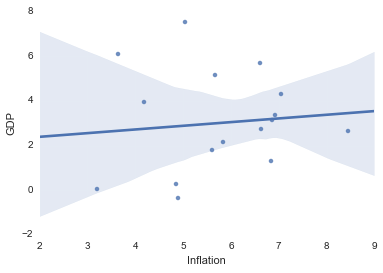

In [38]:
filter = brazil.Inflation < 11.0
sns.regplot(brazil[filter].Inflation, brazil[filter].GDP, robust=True, n_boot=100)

## Regressão entre taxa de juros e inflação

Nota-se taxas de juros elevadas incrementam inflação, porém isso se explica pelo fato de se subir os juros
quando se entende que inflação está elevada. Alega-se em geral que variações nas taxas de juros levam ao
menos 6 meses para atuarem sobre o mercado, assim na próxima seção fazemos um shift de um ano sobre a taxa de juros.

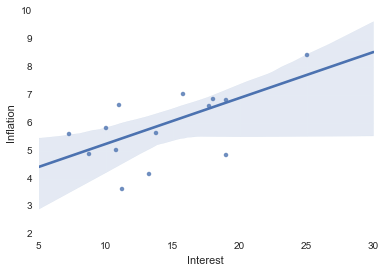

In [39]:
filter = brazil.Inflation < 11.0
sns.regplot(brazil[filter].Interest, brazil[filter].Inflation, robust=True, n_boot=100)

## Regressão entre taxa de juros e inflação no ano seguinte.

Shift

In [40]:
brazil_ir_s1 = brazil.copy()
brazil_ir_s1.Interest = brazil.Interest.shift(1)

Sanity check

In [41]:
brazil_ir_s1[brazil_ir_s1.Inflation < 11]

,GDP,Inflation,Interest
Time,,,
1997,3.375298,6.925317,NaN
1998,0.035346,3.198592,NaN
1999,0.254079,4.857966,NaN
2000,4.306187,7.044702,19.00
2001,1.310000,6.837831,15.75
2002,2.660000,8.450221,19.00
2004,5.710000,6.599125,16.50
2005,3.160000,6.867350,17.75
2006,3.960000,4.183681,18.00


Note que a correlação obtida ainda é **inversa** da propagada.

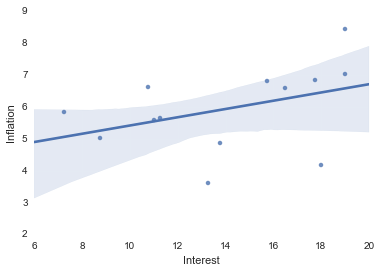

In [42]:
filter = brazil_ir_s1.Inflation < 11
sns.regplot(brazil_ir_s1[filter].Interest, brazil_ir_s1[filter].Inflation)

Talvez os efeitos da taxas de juros no Brasil sejam meio retardados... :-)
Vamos verificar para 2 anos de diferença

## Regressão entre taxa de juros e inflação dois anos à frente.

In [46]:
brazil_ir_s2 = brazil.copy()
brazil_ir_s2.Interest = brazil.Interest.shift(2)


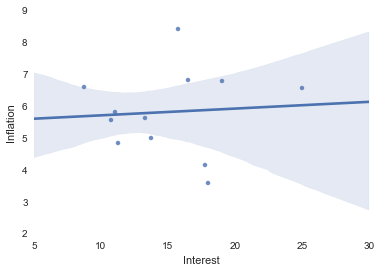

In [48]:
filter = brazil_ir_s2.Inflation < 10
sns.regplot(brazil_ir_s2[filter].Interest, brazil_ir_s2[filter].Inflation)

Esperamos ter derrubado diversos mitos econômicos com esses dados.